In [1]:
import matplotlib.pyplot as plt

# 1.Create a class 'Solow' with attributes being the parameters of the model (n, s, 𝛿, 𝛼, g);(Cobb_Douglas function)
class Solow:
    def __init__(self, n, s, 𝛿, 𝛼, g):
        self.n, self.s, self.𝛿, self.𝛼, self.g = n, s, 𝛿, 𝛼, g
        
    # 2. Add a method which calculates the RHS of the equation (1), given a value for  𝑘𝑡    
    def calc_next_k(self,k_t):
        return ((self.s*(k_t**self.𝛼) + (1-self.𝛿)*k_t)/((1+self.g)*(1+self.n)))
    
    # 3.Add a method that updates the current value of k_t
    def update_k_t(self, k_t):
        k_t = self.calc_next_k(k_t)
        return k_t
    # 4.Add a method that generates a sequence of values for k_t, for t periods
    def gen_k_sequence(self, k_t, t):
        k_sequence = [k_t]
        for index in range(t):
            k_sequence.append(self.calc_next_k(k_sequence[index]))
        return k_sequence
    
    # 5.Add a method that calculates the steady state
    def calc_steady_state(self):
        return ((self.s)/(self.g + self.n + self.δ + self.g * self.n)) ** (1 / (1 - self.α))   
    
    # 6. Add a method that computes the value of the aggregate variables from a value of  𝑘, 𝐴, and 𝐿
    def calc_aggregate(self, k_t, A_t, L_t):
        agg_var = {}
        K_t = k_t * A_t * L_t
        Y_t = ((k_t * A_t * L_t)**(self.𝛼) * (A_t * L_t)**(1-self.𝛼))
        I_t = Y_t * self.s
        C_t = Y_t * (1-self.s)
        agg_var['K'], agg_var['Y'], agg_var['I'], agg_var['C'] = K_t, Y_t, I_t, C_t
        return agg_var 
    
    # 7. Add a method that computes the per worker variables.
    def calc_per_worker(self, k_t, A_t, L_t):
        agg_var = self.calc_aggregate(k_t, A_t, L_t)
        denominator = A_t*L_t
        pw_var = {} #per-worker variables
        y_t = agg_var["Y"]/denominator #output per efficient worker
        c_t = agg_var["C"]/denominator #consumption per efficient worker
        i_t = agg_var["I"]/denominator #investment per efficient worker
        
        pw_var['k'], pw_var['y'], pw_var['i'], pw_var['c'] = k_t,y_t,i_t,c_t

        return pw_var

    # 8. Add a method that generates a series of per worker variables¶.
    def gen_per_worker_seq(self, k_t, A_t, L_t, t):
        pw_sequence = [] #k, y, i, c
        for index in range(t):
            pw_var = self.calc_per_worker(k_t, A_t, L_t)
            pw_sequence.append(pw_var) #entry starts from period 0
            #update
            k_t = self.calc_next_k(k_t)
            A_t = (1+self.g)*A_t
            L_t = (1+self.n)*L_t
        
        return pw_sequence

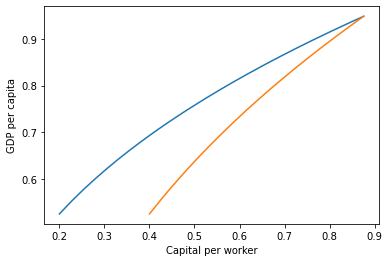

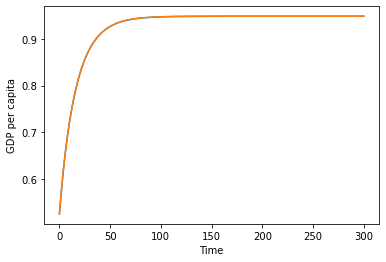

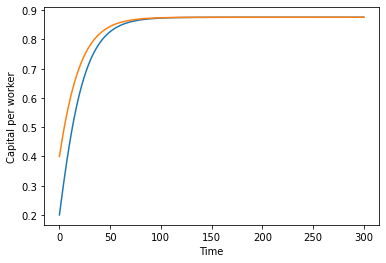

In [2]:
# Set values of initial Solow parameters at average values - sourced from UN, ONS, ECB, Data Reportal

k_example = Solow (n = 0.011, s = 0.09, δ = 0.046, α = 0.40, g = 0.04)

# The steady state of k for a country with these parameters = 0.8760, so let us investigate the path here
# for two identical countries, only differing in starting endowments of capital. Let k0_1 = 0.2 and k0_2 = 0.4

k_sequence_1 = k_example.gen_k_sequence(k_t = 0.2, t = 300)
k_sequence_2 = k_example.gen_k_sequence(k_t = 0.4, t = 300)



y_sequence_1 = k_example.gen_per_worker_seq(k_t = 0.2, A_t = 100, L_t = 100, t = 301)
y_sequence_1a = [year['y'] for year in y_sequence_1]
                                  
y_sequence_2 = k_example.gen_per_worker_seq(k_t = 0.4, A_t = 100, L_t = 100, t = 301)
y_sequence_2a = [year['y'] for year in y_sequence_1]

plt.plot(k_sequence_1, y_sequence_1a)
plt.plot(k_sequence_2, y_sequence_2a)
plt.xlabel("Capital per worker")
plt.ylabel("GDP per capita")
plt.show()

time = 301
time_var = list(range(time))

plt.plot(time_var, k_sequence_1)
plt.plot(time_var, k_sequence_2)
plt.xlabel("Time")
plt.ylabel("Capital per worker")
plt.show()


                                       
